# Day-4: 基础作业
## 1. Run STP with pre- and post- neuron modelled as LIF neuron

In [1]:
import brainpy as bp
import brainpy.math as bm
import matplotlib.pyplot as plt
from Models import STP

In [20]:
def run_STP(inputs, dur, tau_d = 130., tau_f = 530., U=0.03):
  # TO DO: 定义突触前神经元、突触后神经元和突触连接，并构建神经网络
  neu1 = ..
  neu2 = ..
  syn = ..
  net = bp.Network(pre=neu1, syn=syn, post=neu2)
  # TO DO, 将input设置为pre-synaptic neuron的输入，设置DSRunner运行模拟
  runner = ..
  runner.run(dur)

  # 可视化
    
  fig, ax = plt.subplots(4, 1, figsize=(6, 6))
  ax[0].plot(runner.mon.ts, runner.mon['pre.spike'][:, 0], label='pre spike')
  ax[0].legend()
  ax[0].spines['top'].set_visible(False)
  ax[0].spines['right'].set_visible(False)

  ax[1].plot(runner.mon.ts, runner.mon['syn.x'][:, 0], label=r'$x$')
  ax[1].plot(runner.mon.ts, runner.mon['syn.u'][:, 0], label=r'$u$', linestyle='--')
  ax[1].legend()
  ax[1].spines['top'].set_visible(False)
  ax[1].spines['right'].set_visible(False)

  ax[2].plot(runner.mon.ts, runner.mon['syn.g'][:, 0], label=r'$g$', color=u'#d62728')
  ax[2].legend()
  ax[2].spines['top'].set_visible(False)
  ax[2].spines['right'].set_visible(False)
    
  ax[3].plot(runner.mon.ts, runner.mon['post.V'][:, 0], label='post potential')
  ax[3].spines['top'].set_visible(False)
  ax[3].spines['right'].set_visible(False)
  ax[3].legend()

  plt.xlabel(r'$t$ (ms)')
  plt.tight_layout()
  plt.show()

# Run the model
# 设置输入到突触前（分段）电流
I0 = 35.
I1 = 25.
T0 = 200.
T1 = 100.
inputs, dur = bp.inputs.section_input(values=[I0, I1],
                                    durations=[T0, T1],
                                    return_length=True) #设置电流20mA
run_STP(inputs = inputs, dur = dur)

SyntaxError: invalid syntax (1635871098.py, line 3)

## Answer 1

  0%|          | 0/3000 [00:00<?, ?it/s]

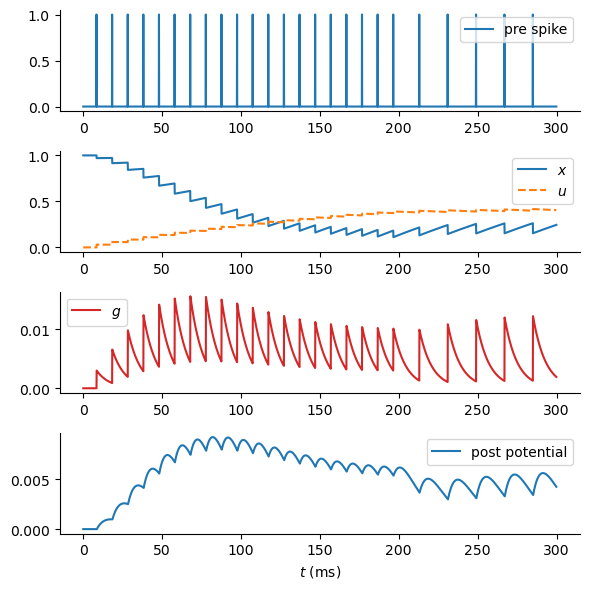

In [2]:
def run_STP(inputs, dur, tau_d = 130., tau_f = 530., U=0.03):
  # 定义突触前神经元、突触后神经元和突触连接，并构建神经网络
  neu1 = bp.neurons.LIF(1)
  neu2 = bp.neurons.LIF(1)
  syn = STP(neu1, neu2, bp.connect.All2All(), tau_d = tau_d, tau_f = tau_f, U=U)
  net = bp.Network(pre=neu1, syn=syn, post=neu2)
    
  # 运行模拟
  runner = bp.DSRunner(net,
                           inputs=[('pre.input', inputs, 'iter')],
                           monitors=['syn.u', 'syn.x', 'syn.g','pre.spike','post.V'])
  runner.run(dur)

  # 可视化
    
  fig, ax = plt.subplots(4, 1, figsize=(6, 6))
  ax[0].plot(runner.mon.ts, runner.mon['pre.spike'][:, 0], label='pre spike')
  ax[0].legend()
  ax[0].spines['top'].set_visible(False)
  ax[0].spines['right'].set_visible(False)

  ax[1].plot(runner.mon.ts, runner.mon['syn.x'][:, 0], label=r'$x$')
  ax[1].plot(runner.mon.ts, runner.mon['syn.u'][:, 0], label=r'$u$', linestyle='--')
  ax[1].legend()
  ax[1].spines['top'].set_visible(False)
  ax[1].spines['right'].set_visible(False)

  ax[2].plot(runner.mon.ts, runner.mon['syn.g'][:, 0], label=r'$g$', color=u'#d62728')
  ax[2].legend()
  ax[2].spines['top'].set_visible(False)
  ax[2].spines['right'].set_visible(False)
    
  ax[3].plot(runner.mon.ts, runner.mon['post.V'][:, 0], label='post potential')
  ax[3].spines['top'].set_visible(False)
  ax[3].spines['right'].set_visible(False)
  ax[3].legend()


  plt.xlabel(r'$t$ (ms)')
  plt.tight_layout()
  plt.show()

# 设置输入到突触前（分段）电流
I0 = 35.
I1 = 25.
T0 = 200.
T1 = 100.
inputs, dur = bp.inputs.section_input(values=[I0, I1],
                                    durations=[T0, T1],
                                    return_length=True) #设置电流20mA
run_STP(inputs = inputs, dur = dur)

## 2. Adjust the time constants to replicate short-term depression and short-term facilitation phenomenoa

  0%|          | 0/10000 [00:00<?, ?it/s]

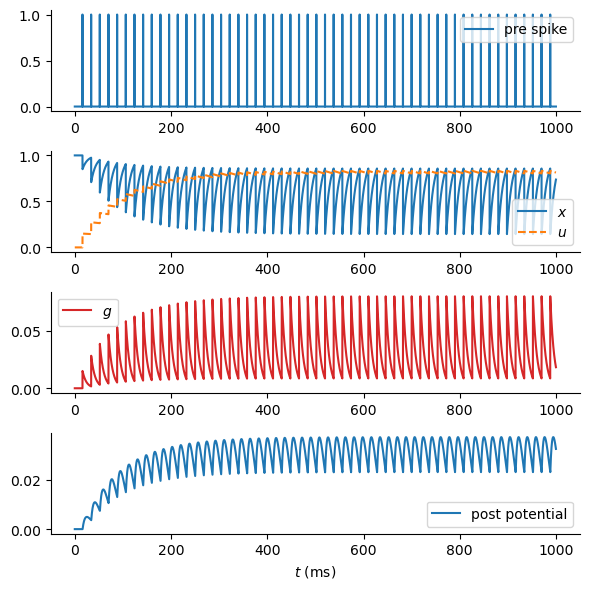

In [3]:
# 设置输入到突触前（分段）电流
I0 = 25.
T0 = 1000.
tau_d = 10.
tau_f = 500.
U = 0.15
inputs, dur = bp.inputs.section_input(values=[I0],
                                    durations=[T0],
                                    return_length=True) #设置电流20mA
run_STP(inputs = inputs, dur = dur, tau_d = tau_d, tau_f = tau_f, U=U)

  0%|          | 0/10000 [00:00<?, ?it/s]

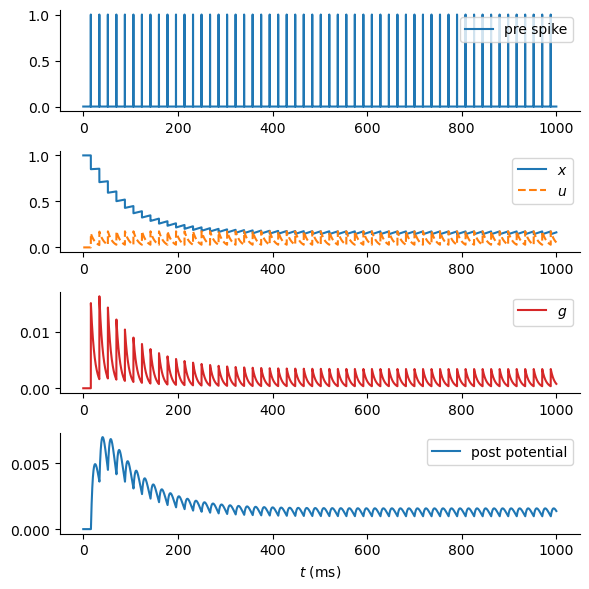

In [4]:
# 设置输入到突触前（分段）电流
I0 = 25.
T0 = 1000.
tau_d = 500.
tau_f = 10.
U = 0.15
inputs, dur = bp.inputs.section_input(values=[I0],
                                    durations=[T0],
                                    return_length=True) #设置电流20mA
run_STP(inputs = inputs, dur = dur, tau_d = tau_d, tau_f = tau_f,U=U)